In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
results_june = results_june.all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_df = pd.DataFrame(results_june, columns=['tobs'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
results_dec = results_dec.all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(results_dec, columns=['tobs'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Queries for Summary

<AxesSubplot:ylabel='Frequency'>

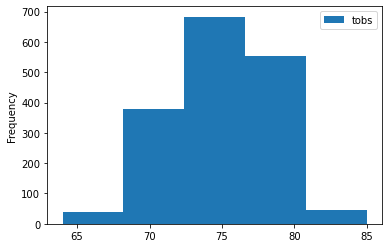

In [12]:
## plot the results of June month temperature data
june_df.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

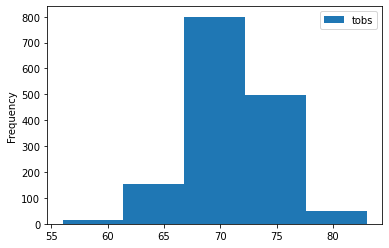

In [13]:
## plot the results of December month data over years as a histogram
dec_df.plot.hist(bins=5)

In [14]:
# How many days in June 2016 was the temperture comfortable at the most active station in Oahu
results_jun_count = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-06-01').\
filter(Measurement.date <= '2016-06-30').\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.tobs >= 72 ).\
filter(Measurement.tobs <= 83).count()
print(results_jun_count)

22


In [15]:
# All tempertures for June month at the most active station in Oahu
results_jun_summ = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-06-01').\
filter(Measurement.date <= '2016-06-30').\
filter(Measurement.station == 'USC00519281').all()

<AxesSubplot:ylabel='Frequency'>

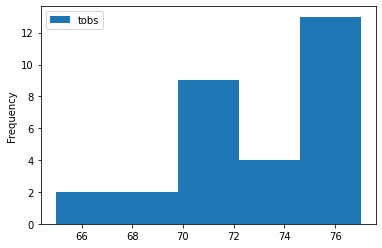

In [16]:
# A Dataframe for tempertures for June month at the most active station in Oahu
dec_summ_df = pd.DataFrame(results_jun_summ, columns=['tobs'])

# A histogram for tempertures for December month at the most active station in Oahu
dec_summ_df.plot.hist(bins=5)

In [17]:
# How many days in December 2016 was the temperture comfortable at the most active station in Oahu
results_dec_count = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-12-01').\
filter(Measurement.date <= '2016-12-31').\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.tobs >= 72).\
filter(Measurement.tobs <= 83).\
count()
print(results_dec_count)

12


In [18]:
# All tempertures for December month at the most active station in Oahu
results_dec_summ = session.query(Measurement.tobs).\
filter(Measurement.date >= '2016-12-01').\
filter(Measurement.date <= '2016-12-31').\
filter(Measurement.station == 'USC00519281').all()

<AxesSubplot:ylabel='Frequency'>

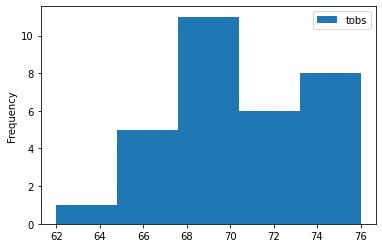

In [19]:
# A Dataframe for tempertures for December month at the most active station in Oahu
dec_summ_df = pd.DataFrame(results_dec_summ, columns=['tobs'])

# A histogram for tempertures for December month at the most active station in Oahu
dec_summ_df.plot.hist(bins=5)